# Análisis de los 25 retailers más grandes de Estados Unidos

![Picture title](image-20220222-115400.png)
Photo by Jack Sparrow from Pexels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

!pip install matplotlib_venn
from matplotlib_venn import venn2

pd.options.mode.chained_assignment = None 

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32065 sha256=a1a4427e5f72feed1131cfc436a35d407d5e2051bd5e226065314aa9a7f30fd5
  Stored in directory: /root/.cache/pip/wheels/42/1c/65/1a733895cd94885d1a97eee84ec7595ff7fddc277a45bcacf5
Successfully built matplotlib-venn
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
df =  pd.read_csv('/work/largest_us_retailers.csv')

## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [ ]:
#Datos
promedio_sin_wm = round(df.loc[df['Company'] != 'Walmart US','Sales'].mean())
ventas_walmart = int(df.loc[df['Company'] == 'Walmart US', 'Sales'])
walmart_market_share = int(round(ventas_walmart/(df['Sales']).sum(),2)*100)
#Ideas principales
print(f'La empresa dominante es Walmart con un total de ventas de ${ventas_walmart:,} millones que representan el {walmart_market_share:,}% del total de las ventas de las 25 empresas más grandes.')
print(f'Mientras que las otras empresas venden, en promedio,  ${promedio_sin_wm:,} millones.')
#Grafico
fig = px.treemap(df,path=['Company'],values='Sales')
fig.show()

La empresa dominante es Walmart con un total de ventas de $658,119 millones que representan el 37% del total de las ventas de las 25 empresas más grandes.
Mientras que las otras empresas venden, en promedio,  $46,602 millones.


### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

Las ventas de ventas de las otras empresas (sin Walmart) presentan un distribución asimetrica. De hecho, hay 14 empresas que tienen ventas entre $16,592 y $45,649 millones.
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Ventas (Millones de Dolares)')

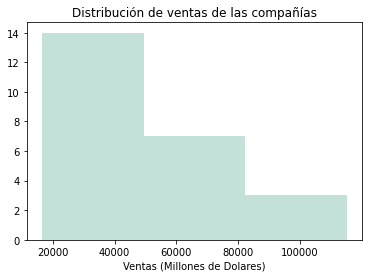

In [ ]:
#Datos
df_otras = df.loc[df['Company'] != 'Walmart US',:] 
venta_total_otras = (df.loc[df['Company'] != 'Walmart US','Sales']).sum()
min_sales_otras = df_otras['Sales'].min()
p33_sales_otras = int(df_otras['Sales'].quantile(14/24))
#Ideas principales
print(f'Las ventas de ventas de las otras empresas (sin Walmart) presentan un distribución asimetrica. De hecho, hay 14 empresas que tienen ventas entre ${min_sales_otras:,} y ${p33_sales_otras:,} millones.')
#Grafico
sns.distplot(a=df_otras['Sales'], kde=False, color='#69b3a2')
plt.title("Distribución de ventas de las compañías")
plt.xlabel('Ventas (Millones de Dólares)')

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

La distribución de la cantidad de tiendas tambien es asimetrica. Hay 16 empresas que tienen entre 231 y 3,123 tiendas.


Text(0.5, 0, 'Cantidad de tiendas')

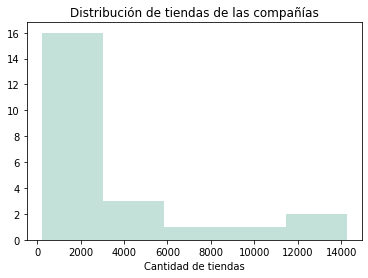

In [ ]:
#Datos
min_stores = int(df['Stores'].min())
p64_stores = int(df['Stores'].quantile(16/23))
#Ideas principales
print(f'La distribución de la cantidad de tiendas tambien es asimetrica. Hay 16 empresas que tienen entre {min_stores:,} y {p64_stores:,} tiendas.')
#Grafico
sns.distplot(a=df['Stores'], kde=False,bins=5, color='#69b3a2')
plt.title("Distribución de tiendas de las compañías")
plt.xlabel('Cantidad de tiendas')

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

Existe un coeficiente de correlación de 0.06 que es muy bajo por lo que no se podria afirmar una relación con certeza.


<AxesSubplot:title={'center':'Relación entre tiendas y ventas de las compañías'}, xlabel='Stores', ylabel='Sales'>

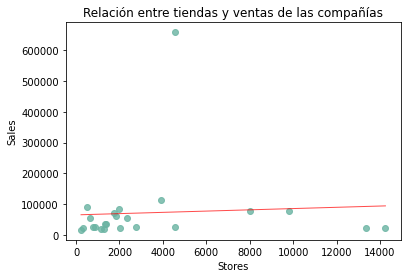

In [ ]:
#Datos
corr_sales_store = round(df['Stores'].corr(df['Sales']),2)
#Ideas
print(f'Existe un coeficiente de correlación de {corr_sales_store} que es muy bajo por lo que no se podria afirmar una relación con certeza.')
#Grafico
plt.title("Relación entre tiendas y ventas de las compañías")
sns.regplot(x=df['Stores'], y=df['Sales'], line_kws={"color":"r","alpha":0.7,"lw":1},ci=False, color='#69b3a2')

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
#Rango con todas las empresas
min_ventas_todas = df['Sales'].min()
max_ventas_todas = df['Sales'].max()
rango_sin_wm = max_ventas_todas-min_ventas_todas
#Rango sin walmart
min_ventas_todas = df_otras['Sales'].min()
max_ventas_todas = df_otras['Sales'].max()
rango_todas = max_ventas_todas-min_ventas_todas
#Ideas
print(f'Como vimos en la la primera pregunta Walmar es una empresa dominante en ventas si la incluimos el rango entre Walmart y la empresa 25 en ventas seria de {rango_sin_wm:,} ')
print(f' de {rango_sin_wm:,} ')

Como vimos en la la primera pregunta Walmar es una empresa dominante en ventas si la incluimos el rango entre Walmart y la empresa 25 en ventas seria de 641,527 
 de 641,527 


### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

Las empresas que estan en el top 5 ventas y tiendas son ['Walmart US', 'Walgreen Boots']


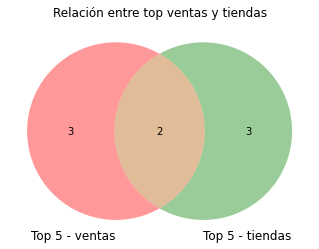

In [ ]:
#Datos
df_top_5_sales = df.sort_values(by='Sales', ascending=False)[0:5]
df_top_5_stores = df.sort_values(by='Stores', ascending=False)[0:5]
top5_both = df_top_5_sales.merge(df_top_5_stores,left_on = 'Stores' ,right_on = 'Stores',how='inner')
top5_both_count = top5_both.value_counts().sum()
top5_left = df_top_5_sales.merge(df_top_5_stores,left_on = 'Stores' ,right_on = 'Stores',how='left')
top5_right = df_top_5_sales.merge(df_top_5_stores,left_on = 'Stores' ,right_on = 'Stores',how='right')
empresas_ambos_top5 = list(top5_both['Company_x'])
#Ideas
print(f'Las empresas que estan en el top 5 ventas y tiendas son {empresas_ambos_top5}')
#Grafico
plt.title("Relación entre top ventas y tiendas")
venn2(subsets = (df_top_5_sales.value_counts().sum() - top5_both_count,df_top_5_stores.value_counts().sum() -top5_both_count, top5_both.value_counts().sum()),
      set_labels = ('Top 5 - ventas', 'Top 5 - tiendas'))
plt.show()

## II. Preguntas adicionales

### 7. ¿Qué categoría de compañía generó más ventas?

La categoría con más ventas es Supermercados con $745,919 millones


Text(0.5, 1.0, 'Ventas, por categoría')

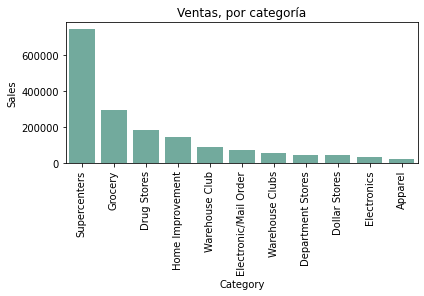

In [ ]:
#Datos
df_categories =  df.groupby(by='Category', as_index=False)['Sales'].sum()
sales_super = int(df_categories.loc[df_categories['Category'] == 'Supercenters','Sales'])
#Ideas
print(f'La categoría con más ventas es Supermercados con ${sales_super:,} millones')
#Grafico
df_categories.sort_values(by='Sales',inplace=True, ascending=False)
sns.barplot(x='Category', y='Sales', data=df_categories, estimator=sum, ci=None, color='#69b3a2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Ventas, por categoría")

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

La empresa que tiene más ventas por tienda fisica es Costco con un total de $181 millones de dólares por tienda.


Text(0.5, 1.0, 'Ventas por tienda física, por compañías')

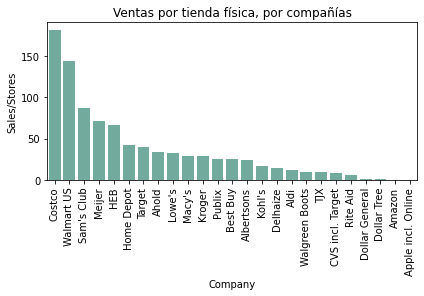

In [ ]:
#Datos
df['Sales/Stores'] = df['Sales']/df['Stores']
df.sort_values(by='Sales/Stores',inplace=True, ascending=False)
costco_sales_stores = int(df.loc[df['Company']=='Costco','Sales/Stores'])
#Idea
print(f'La empresa que tiene más ventas por tienda fisica es Costco con un total de ${costco_sales_stores} millones de dólares por tienda.')
#Grafico
sns.barplot(x='Company', y='Sales/Stores', data=df, estimator=sum, ci=None, color='#69b3a2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Ventas por tienda física, por compañías")

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

Exceptuando Walmart. En promedio, las empresas que venden online tienen mayores ventas que las que tienen tiendas fisicas.


Text(0.5, 0, 'Tipo de empresa')

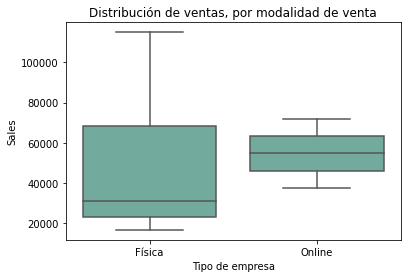

In [ ]:
#datos
df_otras['Modalidad'] = np.where(df_otras['Stores'].isna() == True, 'Online', 'Física')
#Ideas
print(f'Exceptuando Walmart. En promedio, las empresas que venden online tienen mayores ventas que las que tienen tiendas fisicas.')
#Grafico
sns.boxplot(x=df_otras['Modalidad'], y=df_otras['Sales'], color='#69b3a2')
plt.title("Distribución de ventas, por modalidad de venta")
plt.xlabel('Tipo de empresa')

## III. Preguntas del equipo 

### 10. ¿Qué compañías lideran las ventas de cada categoría y cuáles están creciendo en tiendas?

In [ ]:
#Ideas
print('Dentro de la categoría de supermercados Walmart lidera el mercado, en grocery lidera kroger y en fármacos Walgreen.')
print('Empresas que no lideran el mercado en sus industrias como CVS, Aldi, Dollar General vienen creciendo más en número de tiendas que las empresas líderes.')
#Grafico
df_nonull = df.dropna()
fig = px.treemap(df_nonull,path=['Category','Company'],values='Sales', color ='Store Count Growth')
fig.show()

Dentro de la categoría de supermercados Walmart lidera el mercado, en grocery lidera kroger y en fármacos Walgreen.
Empresas que no lideran el mercado en sus industrias como CVS, Aldi, Dollar General vienen creciendo más en número de tiendas que las empresas líderes.


### 11. ¿Hay relación entre el crecimiento en tiendas y las ventas promedio por tienda?

Existe un coeficiente de correlación de -0.06 que es muy bajo por lo que no se podria afirmar una relación con certeza.


<AxesSubplot:title={'center':'Relación entre crecimiento en tiendas y ventas promedio por tienda'}, xlabel='Store Count Growth', ylabel='Sales/Avg. Store'>

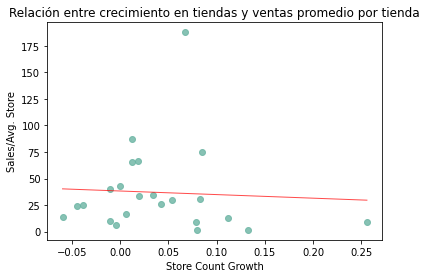

In [ ]:
#Datos
corr_storegrowth_storesales = round(df['Store Count Growth'].corr(df['Sales/Avg. Store']),2)
#Ideas
print(f'Existe un coeficiente de correlación de {corr_storegrowth_storesales} que es muy bajo por lo que no se podria afirmar una relación con certeza.')
#Grafico
plt.title("Relación entre crecimiento en tiendas y ventas promedio por tienda")
sns.regplot(x=df['Store Count Growth'], y=df['Sales/Avg. Store'], line_kws={"color":"r","alpha":0.7,"lw":1},ci=False, color='#69b3a2')

## Conclusiones

1. **Ventas**
   1. Walmart es el lider en ventas de estas empresas. 
   2. Las ventas de las otras empreas aún siguen siendo asimétricas. Aunque 14 de ellas tienen ventas entre \$16,592 y \$45,649 millones.
   3. La categoría predominante en ventas es supermercados seguido comestibles y fármacos. 
2. **Canales de ventas**
   1. Dentro de estas empresas solo 2 usan el canal online y en promedio tienen mejores ventas que las tienen tiendas físicas. 
   2. La distribución de la cantidad de tiendas es asimetrica. Hay 16 empresas que tienen entre 231 y 3,123 tiendas.
   3. Hay una relación positiva muy débil entre el número de tiendas físicas y las ventas. 
   4. Hay  una relación negativa muy débil entre el crecimiento en tiendas físicas y las ventas promedio de las tiendas.
   5. Las empresas lideres en cada categoría no presentan un crecimiento en el número de tiendas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a55254e4-7beb-4f93-9b10-4f0c3c448d83' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>